# Ironhack Final Project: Predictors of Crypto ICO Success

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import time
from datetime import date
import re

import warnings
warnings.filterwarnings('ignore')

## Importing dataset, cleaning and exploration

In [2]:
data = pd.read_csv('Ico_dataset_final.csv')

In [3]:
data.shape

(306, 126)

In [4]:
data.columns

Index(['name_other', 'name_cmc', 'ticker_symbol_cmc', 'ico_successful',
       'soft_cap', 'hard_cap', 'cap_unit', 'cap_includes_presale',
       'token_type', 'number_of_contributors',
       ...
       'Legal entity is corporation', 'Legal entity is LLC',
       'Legal entity is corporation or LLC',
       'Length of crowdsale (calendar days, actual)',
       'Length of crowdsale (calendar days, planned)',
       'lock_up_period_team_ep', 'presale_transparent', 'industry.1',
       '(first) date', 'Time to listing (calendar days)'],
      dtype='object', length=126)

In [3]:
cmc_ticker = list(data['ticker_symbol_cmc'].dropna())
cmc_name = list(data['name_cmc'].dropna())

In [4]:
cmc_name = list(cmc_name)
cmc_ticker = list(cmc_ticker)

In [94]:
data_keep = data[['name_other', 'name_cmc', 'ticker_symbol_cmc', 'token_type','vc_support_blockchain_specialist',
'vc_support_general','registration_country','legal_structure','industry',
'Celebrity endorsement','ico_successful', 'Investors have governance rights',
'KYC/AML procedure','Legal form and jurisdiction known','Length of crowdsale (calendar days, actual)','Team size',
'Time to listing (calendar days)', 'Total amount raised (USDm)', 'Use of proceeds mentioned', 'Whitepaper page count']]

In [91]:
data_keep.shape

(306, 21)

In [ ]:
data_keep.columns

In [ ]:
data_keep.dtypes

## Comparing to CoinMarketCap (CMC) api

In [6]:
cmc_active = pd.read_csv('cmc_api_list.csv', index_col=None)

In [8]:
cmc_active = cmc_active.drop('Unnamed: 0', axis=1)

In [ ]:
cmc_active

In [10]:
# It's returning 506 rows which means the ticker symbols are share by more than one cryptocurrency...

sum(cmc_active.duplicated())

0

In [11]:
# I should end up with 276 rows if the match is correct. Not 506 rows.

len(cmc_name)

276

In [12]:
# Trying to match the cmc api list with the dataset names (from cmc) but it gives 232 rows instead of 276

cmc_match = cmc_active[cmc_active['name'].isin(cmc_name) | cmc_active['slug'].isin(cmc_name)]

In [ ]:
cmc_match

In [14]:
cmc_api = cmc_match['name']

In [15]:
s = set(cmc_api)
compared = [x for x in cmc_name if x not in s]

In [16]:
compared = [item.lower() for item in compared]

In [17]:
compared = [item.replace(' ','-') for item in compared]

In [ ]:
compared

In [19]:
len(compared)

44

In [20]:
difference = cmc_active[cmc_active['slug'].isin(compared)]

In [ ]:
difference

In [22]:
cmc_active_symbol = cmc_active[['symbol', 'is_active']]

cmc_active_symbol

,symbol,is_active
0,1ST,0
1,ABX,1
2,ACT,1
3,ACT,1
4,ADB,1
...,...,...
501,XTZ,1
502,ZENGOLD,0
503,ZRC,0
504,ZRC,0


In [97]:
test = data_keep[data_keep['ticker_symbol_cmc'].isin(cmc_active['symbol'])]

In [ ]:
test

In [99]:
data_with_status = pd.merge(test,cmc_active_symbol,left_on = 'ticker_symbol_cmc', right_on = 'symbol' , how='left')

In [100]:
data_with_status = data_with_status.drop_duplicates()

In [101]:
data_with_status.duplicated().sum()

0

In [31]:
data_with_status.shape

(357, 25)

In [30]:
# Some symbols are reused in the CMC api

data_with_status['ticker_symbol_cmc'].value_counts()

CAT    4
PHX    2
GAT    2
RCN    2
FYN    2
      ..
HVN    1
HBT    1
HMQ    1
ICN    1
ZRC    1
Name: ticker_symbol_cmc, Length: 269, dtype: int64

In [48]:
data_with_status.loc[data_with_status['ticker_symbol_cmc']=='GAT']

,name_other,name_cmc,ticker_symbol_cmc,token_type,vc_support_blockchain_specialist,vc_support_general,registration_country,legal_structure,industry,Amount raised in crowdsale (USDm),...,Legal form and jurisdiction known,"Length of crowdsale (calendar days, actual)",Percentage of hard cap raised (%),Team size,Time to listing (calendar days),Total amount raised (USDm),Use of proceeds mentioned,Whitepaper page count,symbol,is_active
213,Gatcoin,Gatcoin,GAT,Utility-token,No,No,Hong Kong,joint-stock corporation,Commerce & Advertising,1.0,...,1,2,110.0,8.0,6.0,16.0,1,38.0,GAT,1
215,Gatcoin,Gatcoin,GAT,Utility-token,No,No,Hong Kong,joint-stock corporation,Commerce & Advertising,1.0,...,1,2,110.0,8.0,6.0,16.0,1,38.0,GAT,0


In [46]:
test.loc[test['ticker_symbol_cmc']=='PHX']

,name_other,name_cmc,ticker_symbol_cmc,token_type,vc_support_blockchain_specialist,vc_support_general,registration_country,legal_structure,industry,Amount raised in crowdsale (USDm),...,Investors have governance rights,KYC/AML procedure,Legal form and jurisdiction known,"Length of crowdsale (calendar days, actual)",Percentage of hard cap raised (%),Team size,Time to listing (calendar days),Total amount raised (USDm),Use of proceeds mentioned,Whitepaper page count
232,Red Pulse,Red Pulse Phoenix,PHX,Utility-token,Badwater Capital,No,Hong Kong,joint-stock corporation,Finance,10.0,...,0,1,1,1,99.0,3.0,20.0,15.0,1,31.0


In [50]:
cmc_active.loc[cmc_active['symbol']=='GAT']

,id,name,symbol,slug,rank,displayTV,is_active,first_historical_data,last_historical_data,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,platform
209,6213,Global AEX Token,GAT,global-aex-token,2793.0,1,1,2021-03-07T05:15:00.000Z,2022-10-28T09:55:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN
210,10255,Game Ace Token,GAT,game-ace-token,3983.0,1,1,2021-07-19T09:42:02.000Z,2022-10-28T09:57:00.000Z,1839.0,BNB,BNB,bnb,0xF315cfC8550F6FcA969D397cA8b807C5033fA122,NaN
211,2425,Global Awards Token,GAT,global-awards-token,NaN,1,0,2018-01-20T00:29:26.000Z,2020-07-07T23:59:06.000Z,1027.0,Ethereum,ETH,ethereum,0x687174f8c49ceb7729d925c3a961507ea4ac7b28,NaN


In [102]:
df = data_with_status.drop_duplicates('ticker_symbol_cmc', keep='first')
df.shape

(269, 22)

In [103]:
# Probably going to fix this imbalance later...

df['is_active'].value_counts()

1    192
0     77
Name: is_active, dtype: int64

In [ ]:
# After cross-checking, this dataset looks correct. 

df[df['is_active']==0]

In [ ]:
df = df.drop('symbol', axis=1)

In [ ]:
df = df.reset_index(drop=True)

In [138]:
# Replacing column names

cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower().replace(' ','_'))
df.columns = cols

In [ ]:
# Setting a checkpoint before cleaning the data since this is a complicated API-matching dataset...

df.to_csv('data_to_clean.csv')

# Cleaning the columns in my final dataset

In [202]:
data_to_clean = pd.read_csv('data_to_clean.csv', index_col=0)

In [203]:
data_to_clean = data_to_clean.reset_index(drop=True)

In [141]:
data_to_clean.shape

(269, 21)

In [204]:
 # To see the percentage of null values in a column - none above 10% so I think we can clean this up manually

nulls_df = pd.DataFrame(round(data_to_clean.isna().sum()/len(data_to_clean),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

percent_nulls = nulls_df[nulls_df['percent_nulls']>10]
percent_nulls

,header_name,percent_nulls


In [86]:
# I've kept only those columns I can clean well without losing too many rows (since we have a very small dataset)

data_to_clean.isna().sum()

name_other                                      0
name_cmc                                        0
ticker_symbol_cmc                               0
token_type                                      0
vc_support_blockchain_specialist                0
vc_support_general                              0
registration_country                            0
legal_structure                                 0
industry                                        0
celebrity_endorsement                           0
ico_successful                                  0
investors_have_governance_rights                0
kyc/aml_procedure                               0
legal_form_and_jurisdiction_known               0
length_of_crowdsale_(calendar_days,_actual)     0
team_size                                      20
time_to_listing_(calendar_days)                 1
total_amount_raised_(usdm)                     21
use_of_proceeds_mentioned                       0
whitepaper_page_count                           4


In [ ]:
data_to_clean.describe().T

In [205]:
# Filling NaNs in the numerical columns (with median values)

data_to_clean['team_size'] = data_to_clean['team_size'].fillna(data_to_clean['team_size'].median())
data_to_clean['time_to_listing_(calendar_days)'] = data_to_clean['time_to_listing_(calendar_days)'].fillna(data_to_clean['time_to_listing_(calendar_days)'].median())
data_to_clean['total_amount_raised_(usdm)'] = data_to_clean['total_amount_raised_(usdm)'].fillna(data_to_clean['total_amount_raised_(usdm)'].median())
data_to_clean['whitepaper_page_count'] = data_to_clean['whitepaper_page_count'].fillna(data_to_clean['whitepaper_page_count'].median())

In [ ]:
# Success. Now to fix the categoricals

data_to_clean.isna().sum()

In [ ]:
# I want to convert these to count of VCs supporting and collapse into one category for a full count of 'vc support'

data_to_clean['vc_support_blockchain_specialist'].value_counts()	
data_to_clean['vc_support_general'].value_counts()

In [206]:
for i in range(len(data_to_clean['vc_support_general'])):
    data_to_clean['vc_support_general'][i] = 0 if data_to_clean['vc_support_general'][i] == 'No' or data_to_clean['vc_support_general'][i] == 'No ' else data_to_clean['vc_support_general'][i]

/var/folders/kp/1thpb47s3s540gy9cm49qr740000gn/T/ipykernel_49393/2016725481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_clean['vc_support_general'][i] = 0 if data_to_clean['vc_support_general'][i] == 'No' or data_to_clean['vc_support_general'][i] == 'No ' else data_to_clean['vc_support_general'][i]


In [ ]:
data_to_clean['vc_support_general'].value_counts()

In [208]:
for i in range(len(data_to_clean['vc_support_blockchain_specialist'])):
    data_to_clean['vc_support_blockchain_specialist'][i] = 0 if data_to_clean['vc_support_blockchain_specialist'][i] == 'No' or data_to_clean['vc_support_blockchain_specialist'][i] == 'No ' else data_to_clean['vc_support_blockchain_specialist'][i]

/var/folders/kp/1thpb47s3s540gy9cm49qr740000gn/T/ipykernel_49393/4016594257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_clean['vc_support_blockchain_specialist'][i] = 0 if data_to_clean['vc_support_blockchain_specialist'][i] == 'No' or data_to_clean['vc_support_blockchain_specialist'][i] == 'No ' else data_to_clean['vc_support_blockchain_specialist'][i]


In [ ]:
data_to_clean['vc_support_blockchain_specialist'].value_counts()

In [209]:
data_to_clean['vc_count_int'] = data_to_clean['vc_support_general'].str.split(';')

In [210]:
data_to_clean['vc_count_int'].fillna(0, inplace=True)

In [211]:
empty_list = []

for i in data_to_clean['vc_count_int']:
    if i == 0:
        empty_list.append(0)
    elif len(i)>0:
        empty_list.append(len(i))

In [212]:
data_to_clean['vc_count_general'] = empty_list

In [213]:
data_to_clean['vc_count_general'].value_counts()

0    229
1     17
2      8
3      6
4      4
5      3
6      1
8      1
Name: vc_count_general, dtype: int64

In [214]:
data_to_clean['vc_count_int_2'] = data_to_clean['vc_support_blockchain_specialist'].str.split(';')

In [216]:
data_to_clean['vc_count_int_2'].fillna(0, inplace=True)

In [217]:
empty_list_2 = []

for i in data_to_clean['vc_count_int_2']:
    if i == 0:
        empty_list_2.append(0)
    elif len(i)>0:
        empty_list_2.append(len(i))

In [218]:
data_to_clean['vc_count_specialist'] = empty_list_2

In [219]:
data_to_clean['vc_count_specialist'].value_counts()

0    223
1     25
2     10
3      7
4      2
8      2
Name: vc_count_specialist, dtype: int64

In [220]:
data_to_clean['vc_count'] = data_to_clean['vc_count_general'] + data_to_clean['vc_count_specialist']

In [ ]:
data_to_clean['vc_count'].value_counts()

In [ ]:
# Confirming the new 'vc count' columns is correct (thanks, Ferreira)

data_to_clean.head(20)

In [234]:
# Collapse registration country into 10 categories (everything else in the 'other' category)

len(data_to_clean['registration_country'].unique())

9

In [199]:
data_to_clean['registration_country'].value_counts()

Singapore                           44
Switzerland                         38
United States                       37
Cayman Islands                      23
United Kingdom                      16
unknown                             15
Gibraltar                           15
Estonia                             13
Hong Kong                           11
British Virgin Islands               9
Netherlands                          5
Australia                            5
Liechtenstein                        3
Canada                               3
Germany                              3
France                               3
Slovenia                             3
Mauritius                            2
Russian Federation                   2
Israel                               2
Costa Rica                           2
Lithuania                            2
Isle of Man                          2
South Africa                         1
Marshall Islands                     1
Luxembourg               

In [232]:
# Function to collapse countries with fewer than 10 frequency

df_collapse_country = pd.DataFrame(data_to_clean['registration_country'].value_counts()).reset_index()

df_collapse_country.columns = ['country', 'count']
other_countries = list(df_collapse_country[df_collapse_country['count']<10]['country'])

def clean_country(x):
    if x in other_countries:
        return 'other'
    elif x=='unknown':
        return 'other'
    else:
        return x
    
data_to_clean['registration_country'] = list(map(clean_country, data_to_clean['registration_country']))

In [233]:
# Success

data_to_clean['registration_country'].value_counts()

other             72
Singapore         44
Switzerland       38
United States     37
Cayman Islands    23
United Kingdom    16
Gibraltar         15
Estonia           13
Hong Kong         11
Name: registration_country, dtype: int64

In [240]:
# Merge unknown and other into one category for the 'legal_structure' column

data_to_clean['legal_structure'].unique()

data_to_clean['legal_structure'] = data_to_clean['legal_structure'].str.lower()

In [241]:
data_to_clean['legal_structure'].loc[data_to_clean['legal_structure'].isin(['unknown','other'])] = "other"

need = data_to_clean['legal_structure'].value_counts().index[:5]

data_to_clean['legal_structure'] = np.where(data_to_clean['legal_structure'].isin(need), data_to_clean['legal_structure'], 'other')

data_to_clean['legal_structure'].value_counts(dropna=False)

/var/folders/kp/1thpb47s3s540gy9cm49qr740000gn/T/ipykernel_49393/3304833623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_clean['legal_structure'].loc[data_to_clean['legal_structure'].isin(['unknown','other'])] = "other"


joint-stock corporation          180
limited liability partnership     36
other                             34
foundation                        19
Name: legal_structure, dtype: int64

In [167]:
# Leaving this category as is because I can't collapse it easily and don't want ordinals

len(data_to_clean['industry'].unique())

32

In [229]:
# This category 'token_type' is also fine with only 5 unique values

len(data_to_clean['token_type'].unique())

5

In [230]:
data_to_clean['token_type'].value_counts()

Utility-token     168
Security           52
Cryptocurrency     26
New Blockchain     19
unknown             4
Name: token_type, dtype: int64

In [260]:
data_to_clean['ico_successful'] = data_to_clean['ico_successful'].astype(int)
data_to_clean['team_size'] = data_to_clean['team_size'].astype(int)

In [271]:
# Dropping columns that will not go into the prediction models

drop_list = data_to_clean[['name_cmc','name_other','ticker_symbol_cmc', 'vc_support_blockchain_specialist','vc_support_general', 'vc_count_general', 'vc_count_specialist', 'vc_count_int', 'vc_count_int_2']]

In [272]:
data_post_clean = data_to_clean.drop(columns=drop_list)

In [273]:
data_post_clean

,token_type,registration_country,legal_structure,industry,celebrity_endorsement,ico_successful,investors_have_governance_rights,kyc/aml_procedure,legal_form_and_jurisdiction_known,"length_of_crowdsale_(calendar_days,_actual)",team_size,time_to_listing_(calendar_days),total_amount_raised_(usdm),use_of_proceeds_mentioned,whitepaper_page_count,is_active,vc_count
0,Utility-token,Cayman Islands,joint-stock corporation,Trading & Exchanges,0,1,0,1,1,2,12,0.0,26.0,0,16.0,1,4
1,New Blockchain,Singapore,foundation,Blockchain Infrastructure,0,1,0,0,1,1,17,51.0,8.0,0,18.0,1,0
2,Utility-token,other,other,Commerce & Advertising,0,1,0,1,0,24,21,28.0,10.0,1,56.0,1,0
3,Security,other,joint-stock corporation,Finance,0,0,1,1,1,31,9,16.0,1.0,0,11.0,0,0
4,Utility-token,Estonia,joint-stock corporation,Commerce & Advertising,0,1,0,0,1,1,6,1.0,14.0,1,33.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Utility-token,United States,joint-stock corporation,Finance,0,1,0,0,1,42,11,8.0,5.0,1,40.0,1,0
265,Security,Switzerland,foundation,Finance,0,1,0,0,1,50,12,5.0,2.0,0,21.0,1,0
266,unknown,other,other,Events & Entertainment,0,1,0,0,0,24,5,20.0,10.0,0,27.0,1,0
267,Security,other,other,Commodities,0,1,0,0,0,1,9,4.0,0.0,0,19.0,0,0


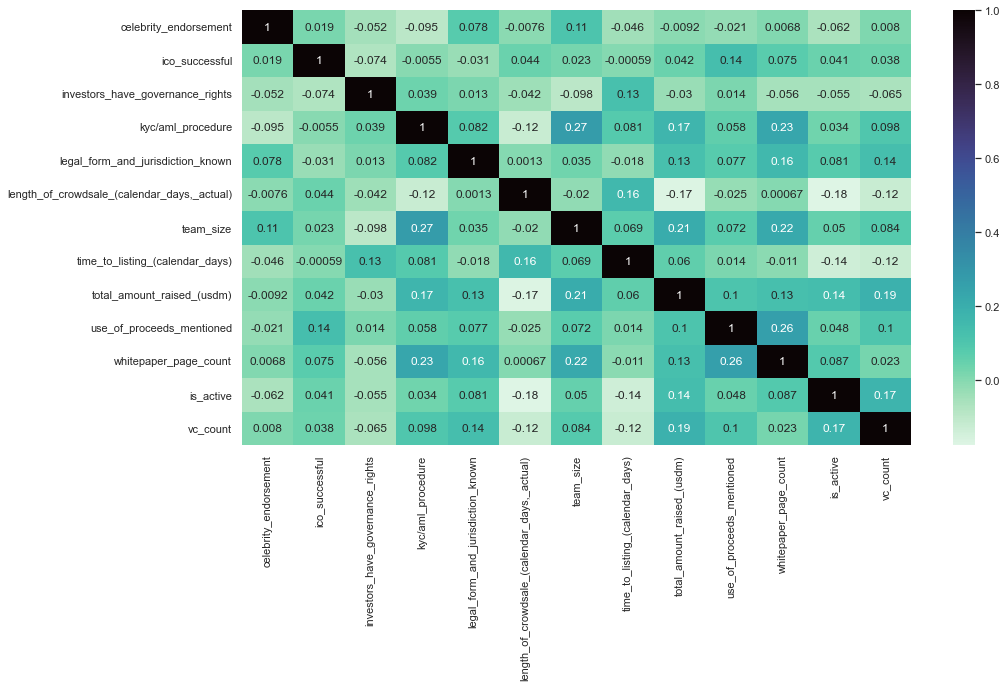

In [472]:
# Before train-test split, looking at the variable correlations
# Pretty solid results -- low multicollinearity between my variables!

correlations_matrix = data_post_clean.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(correlations_matrix, annot=True, cmap='mako_r')
plt.show()

In [274]:
#  Making another checkpoint

data_post_clean.to_csv('data_post_clean.csv')

## Model pre-processing

In [3]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
data_for_processing = pd.read_csv('data_post_clean.csv', index_col=0)

In [277]:
data_for_processing.dtypes

token_type                                      object
registration_country                            object
legal_structure                                 object
industry                                        object
celebrity_endorsement                            int64
ico_successful                                   int64
investors_have_governance_rights                 int64
kyc/aml_procedure                                int64
legal_form_and_jurisdiction_known                int64
length_of_crowdsale_(calendar_days,_actual)      int64
team_size                                        int64
time_to_listing_(calendar_days)                float64
total_amount_raised_(usdm)                     float64
use_of_proceeds_mentioned                        int64
whitepaper_page_count                          float64
is_active                                        int64
vc_count                                         int64
dtype: object

In [5]:
data_cat = ['token_type','registration_country','legal_structure','industry', 'vc_count']

data_dummy = ['celebrity_endorsement', 'ico_successful', 'investors_have_governance_rights', 'kyc/aml_procedure', 'legal_form_and_jurisdiction_known', 'use_of_proceeds_mentioned']

data_num = ['length_of_crowdsale_(calendar_days,_actual)', 'team_size', 'time_to_listing_(calendar_days)', 'total_amount_raised_(usdm)', 'whitepaper_page_count']

In [6]:
def X_y_split(X,y):
    ## Split the data into a training set and a test set.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)

    # split numericals - categoricals
    X_train_num = X_train[data_num]
    X_test_num = X_test[data_num]
    
    X_train_cat = X_train[data_cat]
    X_test_cat = X_test[data_cat]
    
    ## Scale the features either by using normalizer or a standard scaler.
        
    # fit and transform scaling numericals
    minmax = MinMaxScaler().fit(X_train_num) 
    
    X_train_norm = minmax.transform(X_train_num)
    X_test_norm = minmax.transform(X_test_num)

    # convert to dataframe again
    X_train_norm = pd.DataFrame(X_train_norm,columns=X_train_num.columns).reset_index(drop=True)
    X_test_norm = pd.DataFrame(X_test_norm,columns=X_test_num.columns).reset_index(drop=True)
    
    ## Encode the categorical features using One-Hot Encoding
    
    X_train_cat = X_train_cat.astype(str)
    X_test_cat = X_test_cat.astype(str)
    
    # fit and transform encoding categoricals
    onehot = OneHotEncoder(drop='first', handle_unknown='ignore').fit(X_train_cat) 
    
    cols = onehot.get_feature_names_out(input_features=X_train_cat.columns)

    X_train_enc = onehot.transform(X_train_cat).toarray()
    X_test_enc = onehot.transform(X_test_cat).toarray()
    
    # convert to dataframe again
    X_train_enc = pd.DataFrame(X_train_enc, columns=cols).reset_index(drop=True)
    X_test_enc = pd.DataFrame(X_test_enc, columns=cols).reset_index(drop=True)
    
    # ready to fit the model

    data_dummy_train = X_train[data_dummy].reset_index(drop=True)
    data_dummy_test = X_test[data_dummy].reset_index(drop=True)

    X_train_ready = pd.concat([X_train_norm,X_train_enc,data_dummy_train],axis=1)
    X_test_ready = pd.concat([X_test_norm,X_test_enc,data_dummy_test],axis=1)
    
    return X_train_ready, X_test_ready, y_train, y_test

In [7]:
X = data_for_processing.drop(['is_active'], axis=1)
y = data_for_processing[['is_active']]

X_train_ready, X_test_ready, y_train, y_test = X_y_split(X,y)

(201, 16)
(68, 16)
(201, 1)
(68, 1)


In [8]:
# Confirming the scaler worked - success

X_train_ready.describe().T

,count,mean,std,min,25%,50%,75%,max
"length_of_crowdsale_(calendar_days,_actual)",201.0,0.172065,0.141986,0.0,0.047619,0.190476,0.217687,1.0
team_size,201.0,0.191759,0.167980,0.0,0.086957,0.152174,0.217391,1.0
time_to_listing_(calendar_days),201.0,0.723386,0.069215,0.0,0.705007,0.717185,0.736130,1.0
total_amount_raised_(usdm),201.0,0.100769,0.134852,0.0,0.036364,0.068182,0.118182,1.0
whitepaper_page_count,201.0,0.240020,0.138310,0.0,0.149606,0.212598,0.299213,1.0
...,...,...,...,...,...,...,...,...
ico_successful,201.0,0.995025,0.070535,0.0,1.000000,1.000000,1.000000,1.0
investors_have_governance_rights,201.0,0.194030,0.396439,0.0,0.000000,0.000000,0.000000,1.0
kyc/aml_procedure,201.0,0.467662,0.500199,0.0,0.000000,0.000000,1.000000,1.0
legal_form_and_jurisdiction_known,201.0,0.880597,0.325072,0.0,1.000000,1.000000,1.000000,1.0


## Adjusting unbalanced data in the training data target with SMOTE oversampling

In [95]:
from imblearn.over_sampling import SMOTE

In [10]:
sm = SMOTE(random_state=69, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_ready,y_train)

In [439]:
y_train_SMOTE.shape

(286, 1)

## Applying different classification models

In [11]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate

In [12]:
def models_automation(models, X_tr, y_tr, X_te, y_te):
    for model in models:
        model.fit(X_tr, y_tr)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_tr, y_tr)}, Test -> {model.score(X_te, y_te)}")

In [13]:
# Without SMOTE (RFC and DTC are overfitting but not doing parameter / feature optimization here anyway)

models = [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()]

models_automation(models, X_train_ready, y_train, X_test_ready, y_test)

LogisticRegression: Train -> 0.7512437810945274, Test -> 0.6470588235294118
RandomForestClassifier: Train -> 1.0, Test -> 0.7058823529411765
DecisionTreeClassifier: Train -> 1.0, Test -> 0.7205882352941176
KNeighborsClassifier: Train -> 0.7512437810945274, Test -> 0.6176470588235294


In [14]:
# With SMOTE -- The results are worse!

models = [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()]

models_automation(models, X_train_SMOTE, y_train_SMOTE, X_test_ready, y_test)

LogisticRegression: Train -> 0.7673611111111112, Test -> 0.5735294117647058
RandomForestClassifier: Train -> 1.0, Test -> 0.6617647058823529
DecisionTreeClassifier: Train -> 1.0, Test -> 0.6617647058823529
KNeighborsClassifier: Train -> 0.7743055555555556, Test -> 0.5147058823529411


## Evaluating / scoring models

In [15]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import mean_squared_error, r2_score

In [16]:
SVC(random_state=69)

CLF = LogisticRegression()
CLF.fit(X_train_SMOTE, y_train_SMOTE)
pred = CLF.predict(X_test_ready)

In [17]:
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.7317073170731707
recall:  0.625
f1:  0.6741573033707865


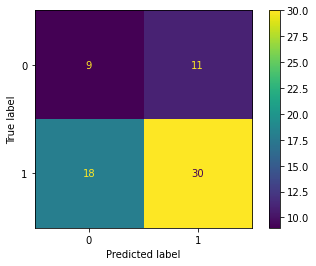

In [47]:
# Given how small my training dataset is, this result is not shocking. 
# Since I am more interested in feature significance, I am ignoring this in the discussion of results 

SVC(random_state=69)
# plt.grid(b=None)
plot_confusion_matrix(CLF, X_test_ready, y_test)  
plt.show()

# Looking at feature coefficients for p-values in classification model

In [21]:
import statsmodels.api as sm

In [86]:
data_for_clf = pd.read_csv('data_post_clean.csv', index_col=0)

In [87]:
data_cat = ['token_type','registration_country','legal_structure','industry', 'vc_count']

data_dummy = ['celebrity_endorsement', 'ico_successful', 'investors_have_governance_rights', 'kyc/aml_procedure', 'legal_form_and_jurisdiction_known', 'use_of_proceeds_mentioned']

data_num = ['length_of_crowdsale_(calendar_days,_actual)', 'team_size', 'time_to_listing_(calendar_days)', 'whitepaper_page_count', 'total_amount_raised_(usdm)']

In [ ]:
# I've made a new function here because I don't want to train-test split my data for this

In [88]:
def clean_features(X):

    # split numericals & categoricals
    X_num = X[data_num]
    X_cat = X[data_cat]

    ## Scale the features either by using normalizer or a standard scaler.
        
    # fit and transform scaling numericals
    minmax = MinMaxScaler().fit(X_num) 
    X_norm = minmax.transform(X_num)

    # convert to dataframe again
    X_norm = pd.DataFrame(X_norm,columns=X_num.columns).reset_index(drop=True)
    
    ## Encode the categorical features using One-Hot Encoding
    
    X_cat = X_cat.astype(str)

    # fit and transform encoding categoricals
    onehot = OneHotEncoder(drop='first', handle_unknown='ignore').fit(X_cat) 
    
    cols = onehot.get_feature_names_out(input_features=X_cat.columns)

    X_enc = onehot.transform(X_cat).toarray()
    
    # convert to dataframe again
    X_enc = pd.DataFrame(X_enc, columns=cols).reset_index(drop=True)
    
    # ready to fit the model

    data_dummy_added = X[data_dummy].reset_index(drop=True)
    X = pd.concat([X_norm,X_enc,data_dummy_added],axis=1)
    
    return X

In [89]:
X_clf_to_process = data_for_clf.drop(['is_active'], axis=1)
y_clf = data_for_clf[['is_active']]

X_clf = clean_features(X_clf_to_process)

In [90]:
y_clf = y_clf.reset_index(drop=True)

In [96]:
# Re-smoting my target labels

smote = SMOTE(random_state=69, k_neighbors=3)
X_clf,y_clf = smote.fit_resample(X_clf,y_clf)

In [111]:
print(X_clf.shape)
y_clf.shape

(384, 67)


(384, 1)

In [120]:
X_added_constant_clf = sm.add_constant(X_clf)
model_clf = sm.Logit(y_clf, X_added_constant_clf).fit(method='bfgs')
pred_clf = round(model_clf.predict(X_added_constant_clf))

         Current function value: 0.523423
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [122]:
print(model_clf.summary())

                           Logit Regression Results                           
Dep. Variable:              is_active   No. Observations:                  384
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                           67
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:                  0.2449
Time:                        12:27:37   Log-Likelihood:                -200.99
converged:                      False   LL-Null:                       -266.17
Covariance Type:            nonrobust   LLR p-value:                 5.795e-06
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.9918      4.188      0.237      0.813      -7.216       9.200
length_of_crowdsale_(calen

In [123]:
clf_result = pd.DataFrame(model_clf.summary2().tables[1])

In [124]:
# Pulling out those variables with p-scores below the 95% confidence threshold

significant_features_clf = list(clf_result[clf_result['P>|z|']<=0.05].index)[0:]

significant_features_clf

['length_of_crowdsale_(calendar_days,_actual)',
 'registration_country_Switzerland',
 'registration_country_other',
 'vc_count_2',
 'use_of_proceeds_mentioned']

In [157]:
significant_features_table = round(clf_result[clf_result['P>|z|']<=0.05], 3)

# Now we can see details for each significant variable: 

significant_features_table

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
"length_of_crowdsale_(calendar_days,_actual)",-3.177,1.138,-2.793,0.005,-5.407,-0.947
registration_country_Switzerland,-1.960,0.685,-2.861,0.004,-3.303,-0.617
registration_country_other,-1.418,0.636,-2.231,0.026,-2.664,-0.172
vc_count_2,2.774,1.190,2.331,0.020,0.442,5.106
use_of_proceeds_mentioned,0.718,0.322,2.227,0.026,0.086,1.350


<AxesSubplot:xlabel='whitepaper_page_count'>

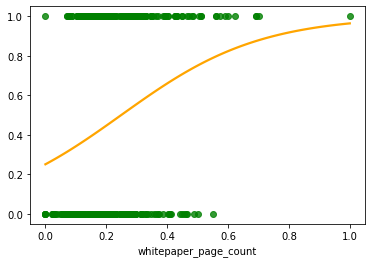

In [125]:
# Doing some plotting to make sure the regression worked and out of curiousity 

sns.regplot(x=X_clf['whitepaper_page_count'], y=pred_clf, logistic=True, ci=None, scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})

<AxesSubplot:xlabel='length_of_crowdsale_(calendar_days,_actual)'>

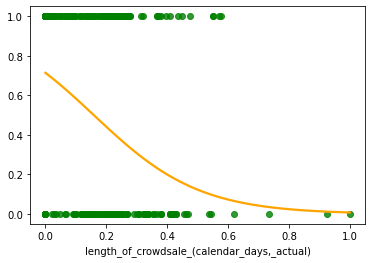

In [126]:
sns.regplot(x=X_clf['length_of_crowdsale_(calendar_days,_actual)'], y=pred_clf, logistic=True, ci=None, scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})

<AxesSubplot:xlabel='registration_country_Switzerland'>

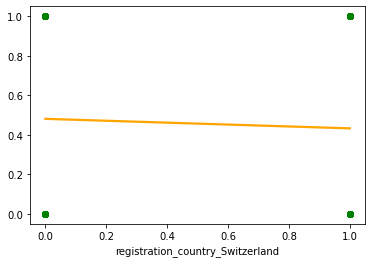

In [148]:
sns.regplot(x=round(X_clf['registration_country_Switzerland']), y=pred_clf, logistic=True, ci=None, scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})

<AxesSubplot:xlabel='use_of_proceeds_mentioned'>

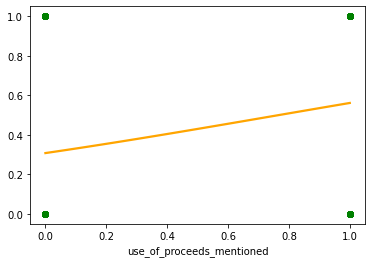

In [128]:
sns.regplot(x=X_clf['use_of_proceeds_mentioned'], y=pred_clf, logistic=True, ci=None, scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})

In [207]:
# Adding marginal effects so we can understand magnitude of effect with the dy/dx column

mfx = model_clf.get_margeff()
mfx_model = mfx.summary().tables[1]

mfx_model_df = pd.DataFrame(mfx_model)

mfx_model_df.rename(columns=mfx_model_df.iloc[0], inplace=True)

mfx_model_df.drop(mfx_model_df.index[0], inplace = True)

mfx_model_df

,,dy/dx,std err,z,P>|z|,[0.025,0.975]
1,"length_of_crowdsale_(calendar_days,_actual)",-0.5398,0.187,-2.892,0.004,-0.906,-0.174
2,team_size,0.0539,0.261,0.206,0.837,-0.458,0.566
3,time_to_listing_(calendar_days),-0.3192,0.462,-0.691,0.490,-1.225,0.586
4,whitepaper_page_count,0.1121,0.204,0.550,0.582,-0.287,0.512
5,total_amount_raised_(usdm),0.2721,0.293,0.928,0.353,-0.303,0.847
...,...,...,...,...,...,...,...
63,ico_successful,0.1176,0.293,0.401,0.688,-0.457,0.692
64,investors_have_governance_rights,0.0232,0.067,0.344,0.731,-0.109,0.155
65,kyc/aml_procedure,-0.0286,0.057,-0.501,0.616,-0.140,0.083
66,legal_form_and_jurisdiction_known,0.1541,0.229,0.672,0.501,-0.295,0.603


In [ ]:
# Exporting this table to CSV so I can grab data for just these variables. Not working when I try via pandas

['length_of_crowdsale_(calendar_days,_actual)',
 'registration_country_Switzerland',
 'registration_country_other',
 'vc_count_2',
 'use_of_proceeds_mentioned']

In [214]:
mfx_model_df.to_csv('mfx_model_df.csv')

## Looking at the Decision Tree

In [208]:
DTC = DecisionTreeClassifier(max_depth = 4)
DTC.fit(X_clf, y_clf)

DecisionTreeClassifier(max_depth=4)

In [218]:
feature_importance = DTC.tree_.compute_feature_importances

In [ ]:
best_features = DTC.tree_.feature[DTC.tree_.feature>=0] # Feature number should not be negative, indicates a leaf node

sorted(zip(best_features,feature_importance(False)[best_features]),key=lambda x:x[1],reverse=True)

In [221]:
best_features

array([ 4,  3,  0,  2,  2,  2,  1,  1, 18, 50,  4,  0,  1, 51],
      dtype=int64)

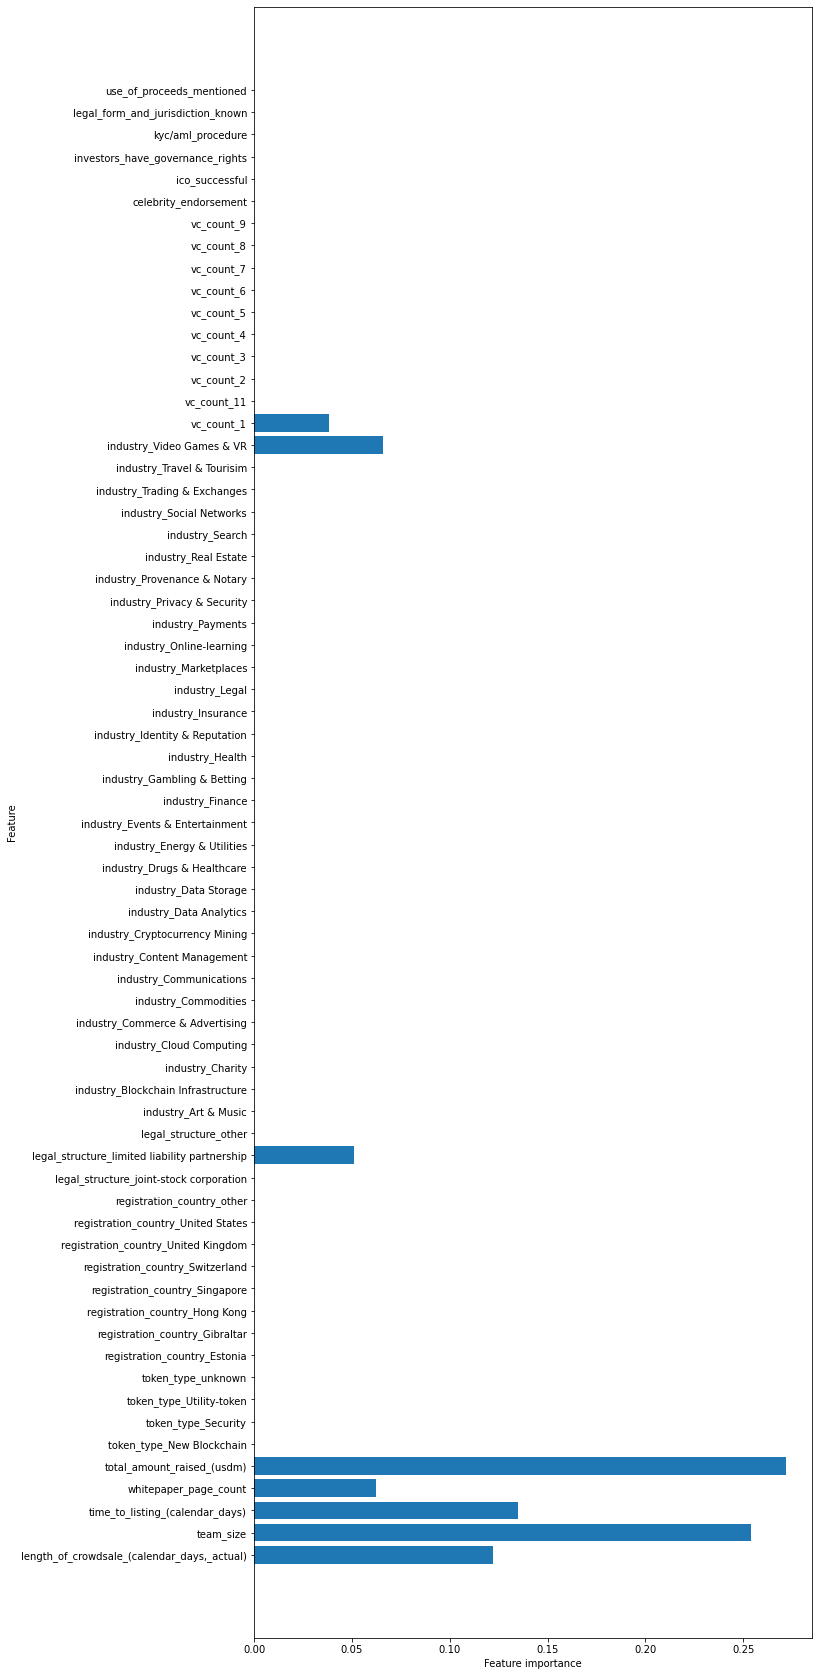

In [223]:
# Looking at feature importance in the DTC model with a bar graph.
# I don't think we can trust these as much as the regression variables because feature_importances isn't necessarily statistically robust (according to SK lean documentation)

def plot_feature_importances_cancer(DTC):
    n_features = X_clf.shape[1]
    plt.figure(figsize=(10,30))
    plt.barh(range(n_features), DTC.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_clf.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(DTC)

In [ ]:
from sklearn.tree import export_text

r = export_text(DTC, feature_names=list(X_clf.columns))
print(r)

# Value is the estimate of the target variable

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(DTC, feature_names=list(X_clf.columns), filled=True)